In [3]:

import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import json
import nltk
import os
import re
import string
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline


In [2]:
pip install nltk

You should consider upgrading via the 'c:\users\hp\pycharmprojects\jupnot\venv\scripts\python.exe -m pip install --upgrade pip' command.



  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
  Using cached regex-2022.1.18-cp310-cp310-win_amd64.whl (273 kB)
  Using cached tqdm-4.62.3-py2.py3-none-any.whl (76 kB)


In [ ]:
pip install pandas

In [ ]:
pip install sklearn

In [ ]:
pip install seaborn

In [ ]:
pip install numpy

In [ ]:
pip install matplotlib

# **Loading of Dataset**

In [4]:

df = pd.read_csv('Data.csv')

In [5]:
df

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,8.160000e+17,"""815745789754417152""","""HoustonPokeMap""","""Houston, TX""","""Rare and strong PokŽmon in Houston, TX. See m...","""https://t.co/dnWuDbFRkt""",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\r ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,False,"""Houston PokŽ Alert""",1
1,4.843621e+09,4843621225,kernyeahx,"Templeville town, MD, USA",From late 2014 Socium Marketplace will make sh...,NaN,1,349,0,2/1/2016 7:37,38,False,31,en,NaN,True,False,False,Keri Nelson,1
2,4.303727e+09,4303727112,mattlieberisbot,NaN,"Inspired by the smart, funny folks at @replyal...",https://t.co/P1e1o0m4KC,1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,False,Matt Lieber Is Bot,1
3,3.063139e+09,3063139353,sc_papers,NaN,NaN,NaN,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,False,single cell papers,1
4,2.955142e+09,2955142070,lucarivera16,"Dublin, United States",Inspiring cooks everywhere since 1956.,NaN,11,745,0,1/1/2015 17:44,146,False,185,en,NaN,False,False,False,lucarivera16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,2.362091e+08,236209129,leslieberland,NaN,"Twitter CMO. Favorite title: Mama. Never, ever...",NaN,18998,2005,425,1/10/2011 2:06,2503,False,3498,en,RT @StationCDRKelly: Dreaming of napping in sp...,False,False,True,Leslie Berland,0
2793,2.545039e+08,254503881,SamuelsPants,brooklyn NY,"I live in brooklyn, I'm a bike messenger, I pl...",http://t.co/CQkADdjfaw,32,54,0,Sat Feb 19 12:12:42 +0000 2011,1,False,97,en,"{'geo': None, 'in_reply_to_status_id': None, '...",True,False,False,Samuel Littlefield,0
2794,1.548544e+07,15485441,jimmyfallon,"New York, New York",astrophysicist,http://t.co/fgp5RYqr3T,45044433,7451,68157,7/18/2008 19:46,24,True,9606,en,"Status(contributors=None, truncated=False, tex...",False,False,False,jimmy fallon,0
2795,7.513869e+08,751386872,LocalAlligator,"England, United Kingdom","I'm quite out of my mind, actually, but people...",NaN,16,64,1,8/11/2012 14:53,15,False,62,en,{'created_at': 'Sun Feb 26 15:51:57 +0000 2017...,False,False,True,Tammas Foxdene,0


In [6]:
df.columns

Index(['id', 'id_str', 'screen_name', 'location', 'description', 'url',
       'followers_count', 'friends_count', 'listed_count', 'created_at',
       'favourites_count', 'verified', 'statuses_count', 'lang', 'status',
       'default_profile', 'default_profile_image', 'has_extended_profile',
       'name', 'bot'],
      dtype='object')

In [7]:
print('Dataset Shape: ', df.shape, '\n')

Dataset Shape:  (2797, 20) 



In [8]:
df.describe()

,id,followers_count,friends_count,listed_count,favourites_count,statuses_count,bot
count,2.797000e+03,2.797000e+03,2.797000e+03,2797.000000,2797.000000,2.797000e+03,2797.000000
mean,1.482460e+17,9.964245e+05,4.796493e+03,3192.299964,2035.577047,1.945170e+04,0.472292
std,3.100578e+17,5.593714e+06,5.619217e+04,17283.423291,16073.463967,1.543729e+05,0.499321
min,3.526000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,6.895649e+07,4.400000e+01,1.100000e+01,1.000000,0.000000,1.660000e+02,0.000000
50%,1.917035e+09,3.430000e+02,1.840000e+02,17.000000,25.000000,2.240000e+03,0.000000
75%,3.326332e+09,1.372500e+04,6.690000e+02,332.000000,491.000000,1.004200e+04,1.000000
max,8.410000e+17,9.632156e+07,2.056668e+06,620331.000000,714021.000000,6.863363e+06,1.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_27596\3315330901.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df[features].corr(), dtype = np.bool)


<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

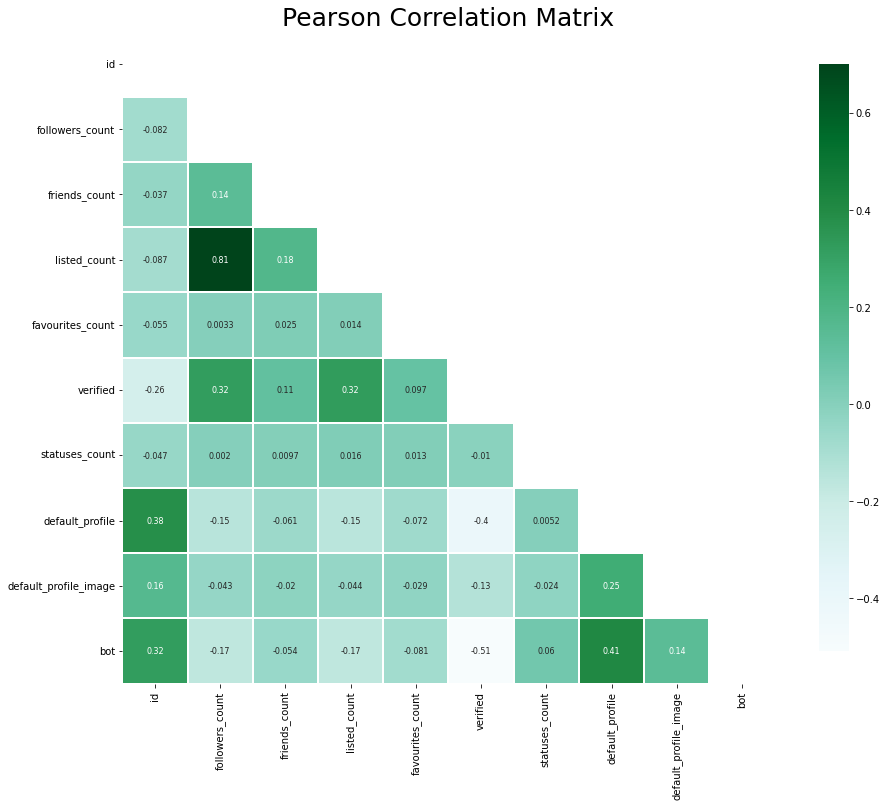

In [9]:
features = ['id', 'id_str', 'screen_name', 'location', 'description', 'url',
       'followers_count', 'friends_count', 'listed_count', 'created_at',
       'favourites_count', 'verified', 'statuses_count', 'lang', 'status',
       'default_profile', 'default_profile_image', 'has_extended_profile',
       'name', 'bot']

mask = np.zeros_like(df[features].corr(), dtype = np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths = 0.25,vmax = 0.7,square = True,cmap = "BuGn", 
            linecolor = 'w',annot = True,annot_kws = {"size":8},mask = mask,cbar_kws = {"shrink": 0.9})

In [10]:
#Classifying Bots and non bots on the basis of binary values
training_data = pd.read_csv('Data.csv')
bots = training_data[training_data.bot==1]
nonbots = training_data[training_data.bot==0]

In [11]:
bots

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,8.160000e+17,"""815745789754417152""","""HoustonPokeMap""","""Houston, TX""","""Rare and strong PokŽmon in Houston, TX. See m...","""https://t.co/dnWuDbFRkt""",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\r ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,False,"""Houston PokŽ Alert""",1
1,4.843621e+09,4843621225,kernyeahx,"Templeville town, MD, USA",From late 2014 Socium Marketplace will make sh...,NaN,1,349,0,2/1/2016 7:37,38,False,31,en,NaN,True,False,False,Keri Nelson,1
2,4.303727e+09,4303727112,mattlieberisbot,NaN,"Inspired by the smart, funny folks at @replyal...",https://t.co/P1e1o0m4KC,1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,False,Matt Lieber Is Bot,1
3,3.063139e+09,3063139353,sc_papers,NaN,NaN,NaN,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,False,single cell papers,1
4,2.955142e+09,2955142070,lucarivera16,"Dublin, United States",Inspiring cooks everywhere since 1956.,NaN,11,745,0,1/1/2015 17:44,146,False,185,en,NaN,False,False,False,lucarivera16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,3.299611e+09,3299611091,emojitoemoji,NaN,a bot by @inky // source: https://t.co/MJyd6NkYaf,http://t.co/PdagJGIwEp,93,0,24,Tue May 26 18:23:01 +0000 2015,0,False,5145,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,[face] to [face],1
1317,7.450000e+17,7.45E+17,gridgenerator,NaN,Simple generated grids three times a day. bot ...,NaN,36,1,11,Tue Jun 21 15:26:48 +0000 2016,0,False,793,en,"{u'contributors': None, u'truncated': False, u...",True,False,False,grids grids grids,1
1318,2.598999e+09,2598999212,moltar_ebooks,NaN,NaN,NaN,60,32,6,Wed Jul 02 03:10:52 +0000 2014,2,False,4365,en,"{u'contributors': None, u'truncated': False, u...",True,False,False,MOLTAR EBOOKS,1
1319,2.386845e+09,2386845055,DCell_papers,Manchester,Journal paper feed for academics interested in...,NaN,214,0,20,3/13/2014 11:41,0,False,9727,en,Kynurenic acid downregulates IL-17/1L-23 axis ...,True,False,False,Dendritic cells,1


In [12]:
nonbots

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
1321,34716038.0,34716038,aaroncarter,Sony Recording Artist,NEW AARON CARTER MUSIC DOWNLOAD LINK LÌüVÌÇ EP...,NaN,571310,76070,4909,Thu Apr 23 20:15:49 +0000 2009,37437,True,56077,en,"{u'contributors': None, u'truncated': False, u...",False,False,True,Aaron Carter,0
1322,3013511.0,3013511,michellebranch,NaN,"singer/songwriter, hopeless romantic, drinker ...",https://t.co/2vSKw7cmzC,292385,963,6076,Fri Mar 30 20:58:59 +0000 2007,1248,True,16688,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,Michelle Branch,0
1323,56237623.0,56237623,stronginmyfaith,NaN,NaN,NaN,1,7,0,7/13/2009 0:38,0,False,3,en,"Status(contributors=None, truncated=False, tex...",True,True,False,laurie lindeman,0
1324,27964284.0,27964284,Jessicaveronica,5th Dimension,"@TheVeronicas ‰Ü Wanderer, worshiper, if you ...",https://t.co/U6yNZoDZfu,222659,352,3261,Tue Mar 31 21:12:33 +0000 2009,143,True,10999,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,Jessica Veronica,0
1325,552876065.0,552876065,resargento,brasil,meio ogra mas o coraí_í£o í© de mocinha,NaN,646,446,2,4/13/2012 17:37,13440,False,25292,pt,NaN,False,False,False,rebosta,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,236209129.0,236209129,leslieberland,NaN,"Twitter CMO. Favorite title: Mama. Never, ever...",NaN,18998,2005,425,1/10/2011 2:06,2503,False,3498,en,RT @StationCDRKelly: Dreaming of napping in sp...,False,False,True,Leslie Berland,0
2793,254503881.0,254503881,SamuelsPants,brooklyn NY,"I live in brooklyn, I'm a bike messenger, I pl...",http://t.co/CQkADdjfaw,32,54,0,Sat Feb 19 12:12:42 +0000 2011,1,False,97,en,"{'geo': None, 'in_reply_to_status_id': None, '...",True,False,False,Samuel Littlefield,0
2794,15485441.0,15485441,jimmyfallon,"New York, New York",astrophysicist,http://t.co/fgp5RYqr3T,45044433,7451,68157,7/18/2008 19:46,24,True,9606,en,"Status(contributors=None, truncated=False, tex...",False,False,False,jimmy fallon,0
2795,751386872.0,751386872,LocalAlligator,"England, United Kingdom","I'm quite out of my mind, actually, but people...",NaN,16,64,1,8/11/2012 14:53,15,False,62,en,{'created_at': 'Sun Feb 26 15:51:57 +0000 2017...,False,False,True,Tammas Foxdene,0


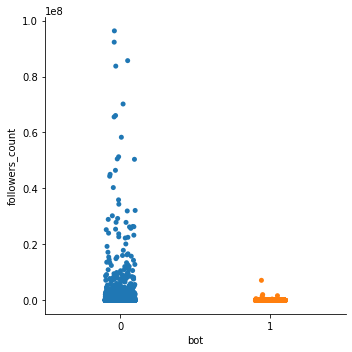

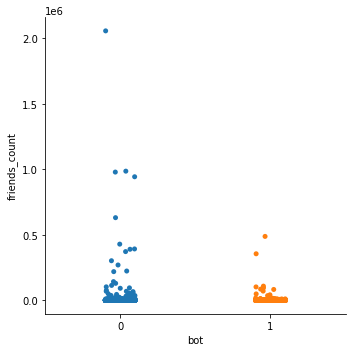

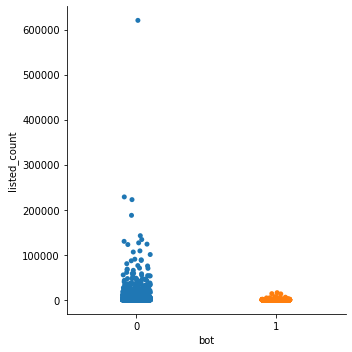

In [13]:
sns.catplot(x="bot", y="followers_count", data=df);
sns.catplot(x="bot", y="friends_count", data=df);
sns.catplot(x="bot", y="listed_count", data=df);

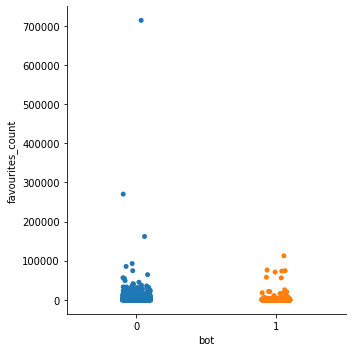

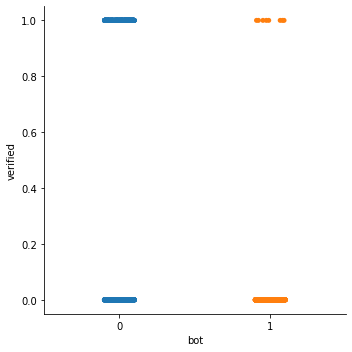

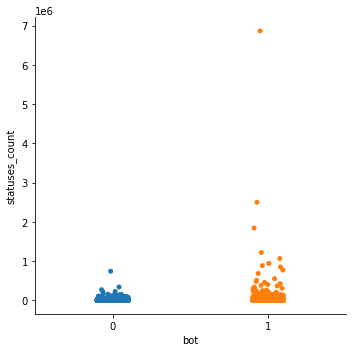

In [14]:
sns.catplot(x="bot", y="favourites_count", data=df);
sns.catplot(x="bot", y="verified", data=df);
sns.catplot(x="bot", y="statuses_count", data=df);

In [15]:
#converting bots and nonbots dataframe to a csv file
bots.to_csv('bot_data.csv', index=False)
nonbots.to_csv('nonbot_data.csv', index = False)

In [16]:
test = pd.read_csv('Test Data.csv')
test

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,favorites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,2.281293e+09,2281292622,__keating,brooklyn,lgbt editor at @buzzfeed. shannon.keating@buzz...,https://t.co/QneJmYRyhj,4466,1295,111,Tue Jan 07 23:26:52 +0000 2014,1579,TRUE,3036,en,{'created_at': 'Tue Apr 11 15:31:51 +0000 2017...,FALSE,FALSE,FALSE,shannon keating,NaN
1,2.344040e+09,2344040251,_callme_Dani,"Los Angeles, CA",News Curation Editor @BuzzFeedNews \rI do a lo...,NaN,295,1016,10,Fri Feb 14 19:45:56 +0000 2014,300,FALSE,618,en,{'created_at': 'Tue Apr 11 00:56:02 +0000 2017...,FALSE,FALSE,FALSE,Danielle Hopkins,NaN
2,7.658713e+08,765871267,_little_britt_,NaN,Family comes first! Also I am in love with piz...,https://t.co/E7DE1cJB7e,1001678,3017,14,8/18/2012 15:13,13040,TRUE,3329,en,"{'place': None, 'retweeted': False, 'favorited...",TRUE,FALSE,TRUE,Brittney Smith,NaN
3,4.772373e+09,4772373433,134k5,NaN,@BuzzFeedJapan ��� @cnet_japan / DM��܋�㋁_��_��...,https://t.co/Cbguzs2PjT,445,487,17,Sun Jan 17 07:11:45 +0000 2016,1112,FALSE,46,ja,{'created_at': 'Sat Apr 08 08:41:08 +0000 2017...,FALSE,FALSE,TRUE,Keigo Isashi,NaN
4,1.324549e+09,None,2181chrom_bot,自分の天幕,これはFE覚醒のクロム…つまり俺がツイ廃なbotらしい。よく分からんがネタ要素しかないそうだ...,http://t.co/10Swf6luED,187,68,13,Wed Apr 03 13:00:42 +0000 2013,None,None,690359,ja,"{u'lang': u'ja', u'text': u'@2181lucina_bot \u...",None,None,None,ツイ廃クロムbot,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,7.509990e+17,7.51E+17,yourtechbot,"California, USA",Built with special algorithm to retweet about ...,https://t.co/EX2WJ8tr3Z,1551,138,3119,7/7/2016 10:23,1,FALSE,37318,en,"{'favorite_count': 1, 'id': 805700033458872320...",TRUE,FALSE,TRUE,TechBot,NaN
571,1.022827e+07,None,YouTube,"San Bruno, CA",lol watch this,https://t.co/F3fLcf5sH7,67697733,998,82023,Tue Nov 13 21:43:46 +0000 2007,None,TRUE,19364,en,"{u'lang': u'en', u'text': u'The speed run to e...",None,None,None,YouTube,NaN
572,2.188339e+08,None,Yuki_Haruna_bot,修智館学院,PCゲームメーカー「August」のゲーム「FORTUNE ARTERIAL」に登場する悠木...,http://t.co/OXkSU7iF4D,1257,363,75,Tue Nov 23 11:35:02 +0000 2010,None,None,388672,ja,"{u'lang': u'ja', u'text': u'\u3054\u3081\u3093...",TRUE,None,None,悠木陽菜,NaN
573,1.765662e+08,None,zaynmalik,LA,pathetically aesthetic🍊https://t.co/f2zHtV0s2J,https://t.co/aoYRSS2yDT,21585872,2279,128136,Mon Aug 09 21:54:10 +0000 2010,None,TRUE,3318,en,"{u'lang': u'und', u'text': u';) https://t.co/p...",None,None,None,zayn,NaN


# **Data Reading & Cleaning**

In [17]:
bot_data = pd.read_csv('bot_data.csv')
nonbot_data = pd.read_csv('nonbot_data.csv')

In [18]:
train_attr = df[['followers_count', 'friends_count', 'listed_count', 'favourites_count', 'statuses_count', 'verified']]
train_label = df[['bot']]

In [19]:
bot_attr = bot_data[['followers_count', 'friends_count', 'listed_count', 'favourites_count', 'statuses_count', 'verified']]
bot_label = bot_data[['bot']]

nonbot_attr = nonbot_data[['followers_count', 'friends_count', 'listed_count', 'favourites_count', 'statuses_count', 'verified']]
nonbot_label = nonbot_data[['bot']]

test_attr = test[['followers_count', 'friends_count', 'listed_count', 'favorites_count', 'statuses_count', 'verified']]
test_label = test[['bot']]

# **Exploratory Data Analysis**

To identify Missingness in the data

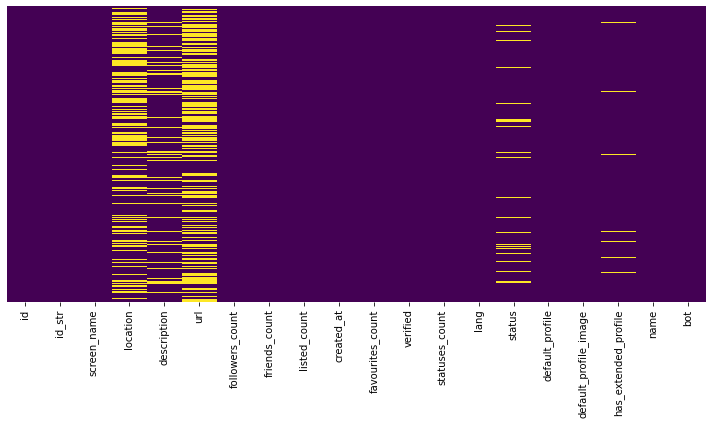

In [20]:
def get_heatmap(data):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(10,6))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(training_data)

c:\users\hp\pycharmprojects\jupnot\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\hp\pycharmprojects\jupnot\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


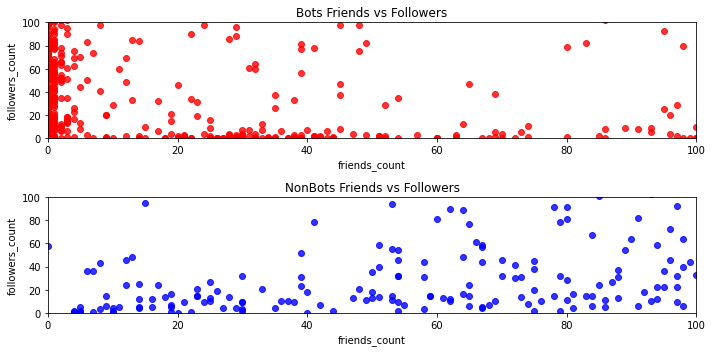

In [21]:
bots.friends_count/bots.followers_count

plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.title('Bots Friends vs Followers')
sns.regplot(bots.friends_count, bots.followers_count, color='red', label='Bots')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()

plt.subplot(2,1,2)
plt.title('NonBots Friends vs Followers')
sns.regplot(nonbots.friends_count, nonbots.followers_count, color='blue', label='NonBots')
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

# Identifying imbalance in data

In [22]:
bots['friends_by_followers'] = bots.friends_count/bots.followers_count
bots[bots.friends_by_followers<1].shape

nonbots['friends_by_followers'] = nonbots.friends_count/nonbots.followers_count
nonbots[nonbots.friends_by_followers<1].shape

C:\Users\HP\AppData\Local\Temp\ipykernel_27596\957250149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bots['friends_by_followers'] = bots.friends_count/bots.followers_count
C:\Users\HP\AppData\Local\Temp\ipykernel_27596\957250149.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonbots['friends_by_followers'] = nonbots.friends_count/nonbots.followers_count


(952, 21)

(504, 21)


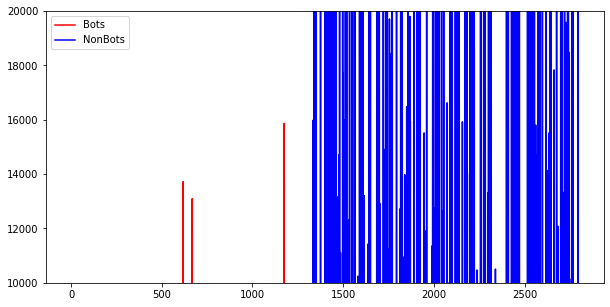

In [23]:
plt.figure(figsize=(10,5))
plt.plot(bots.listed_count, color='red', label='Bots')
plt.plot(nonbots.listed_count, color='blue', label='NonBots')
plt.legend(loc='upper left')
plt.ylim(10000,20000)
print(bots[(bots.listed_count<5)].shape)

In [24]:
bots_listed_count_df = bots[bots.listed_count<16000]
nonbots_listed_count_df = nonbots[nonbots.listed_count<16000]

bots_verified_df = bots_listed_count_df[bots_listed_count_df.verified==False]
bots_screenname_has_bot_df_ = bots_verified_df[(bots_verified_df.screen_name.str.contains("bot", case=False)==True)].shape

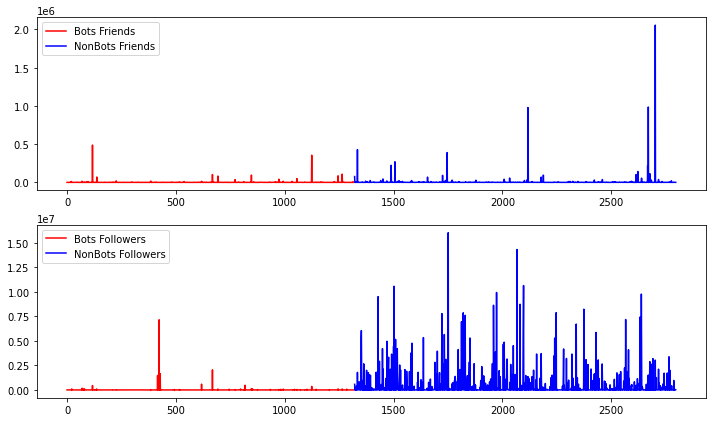

In [25]:
plt.figure(figsize=(12,7))

plt.subplot(2,1,1)
plt.plot(bots_listed_count_df.friends_count, color='red', label='Bots Friends')
plt.plot(nonbots_listed_count_df.friends_count, color='blue', label='NonBots Friends')
plt.legend(loc='upper left')

plt.subplot(2,1,2)
plt.plot(bots_listed_count_df.followers_count, color='red', label='Bots Followers')
plt.plot(nonbots_listed_count_df.followers_count, color='blue', label='NonBots Followers')
plt.legend(loc='upper left')

In [26]:
#bots[bots.listedcount>10000]
condition = (bots.screen_name.str.contains("bot", case=False)==True)|(bots.description.str.contains("bot", case=False)==True)|(bots.location.isnull())|(bots.verified==False)

bots['screen_name_binary'] = (bots.screen_name.str.contains("bot", case=False)==True)
bots['location_binary'] = (bots.location.isnull())
bots['verified_binary'] = (bots.verified==False)
bots.shape

C:\Users\HP\AppData\Local\Temp\ipykernel_27596\2128155473.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bots['screen_name_binary'] = (bots.screen_name.str.contains("bot", case=False)==True)
C:\Users\HP\AppData\Local\Temp\ipykernel_27596\2128155473.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bots['location_binary'] = (bots.location.isnull())
C:\Users\HP\AppData\Local\Temp\ipykernel_27596\2128155473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

(1321, 24)

In [27]:
condition = (nonbots.screen_name.str.contains("bot", case=False)==False)| (nonbots.description.str.contains("bot", case=False)==False) |(nonbots.location.isnull()==False)|(nonbots.verified==True)

nonbots['screen_name_binary'] = (nonbots.screen_name.str.contains("bot", case=False)==False)
nonbots['location_binary'] = (nonbots.location.isnull()==False)
nonbots['verified_binary'] = (nonbots.verified==True)

nonbots.shape


C:\Users\HP\AppData\Local\Temp\ipykernel_27596\2891353468.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonbots['screen_name_binary'] = (nonbots.screen_name.str.contains("bot", case=False)==False)
C:\Users\HP\AppData\Local\Temp\ipykernel_27596\2891353468.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonbots['location_binary'] = (nonbots.location.isnull()==False)
C:\Users\HP\AppData\Local\Temp\ipykernel_27596\2891353468.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

(1476, 24)

In [28]:
df = pd.concat([bots, nonbots])
df.shape

(2797, 24)

# Feature Independence using Spearman correlation

In [29]:
df.corr(method='spearman')

,id,followers_count,friends_count,listed_count,favourites_count,verified,statuses_count,default_profile,default_profile_image,bot,friends_by_followers,screen_name_binary,location_binary,verified_binary
id,1.000000,-0.672925,-0.402346,-0.615005,-0.439430,-0.611899,-0.451945,0.522990,0.166601,0.652131,0.270435,-0.576100,-0.228328,0.150100
followers_count,-0.672925,1.000000,0.375522,0.896126,0.457363,0.709732,0.649117,-0.496899,-0.293838,-0.468430,-0.577157,0.458213,0.189675,0.130717
friends_count,-0.402346,0.375522,1.000000,0.204403,0.641529,0.356452,0.111118,-0.296358,-0.097607,-0.483105,0.427638,0.342145,0.082692,-0.210592
listed_count,-0.615005,0.896126,0.204403,1.000000,0.349059,0.694340,0.684976,-0.447376,-0.269035,-0.318445,-0.681034,0.338698,0.188797,0.281360
favourites_count,-0.439430,0.457363,0.641529,0.349059,1.000000,0.394227,0.295108,-0.348043,-0.226956,-0.526228,0.104797,0.408864,0.120941,-0.220894
verified,-0.611899,0.709732,0.356452,0.694340,0.394227,1.000000,0.333278,-0.404650,-0.132298,-0.508555,-0.419815,0.434177,0.191922,0.346505
statuses_count,-0.451945,0.649117,0.111118,0.684976,0.295108,0.333278,1.000000,-0.375918,-0.289999,-0.089018,-0.533971,0.162213,0.105333,0.207384
default_profile,0.522990,-0.496899,-0.296358,-0.447376,-0.348043,-0.404650,-0.375918,1.000000,0.246979,0.407748,0.197929,-0.377572,-0.138378,0.072351
default_profile_image,0.166601,-0.293838,-0.097607,-0.269035,-0.226956,-0.132298,-0.289999,0.246979,1.000000,0.139669,0.190986,-0.166388,0.000596,0.033021
bot,0.652131,-0.468430,-0.483105,-0.318445,-0.526228,-0.508555,-0.089018,0.407748,0.139669,1.000000,-0.044056,-0.843429,-0.266342,0.606771


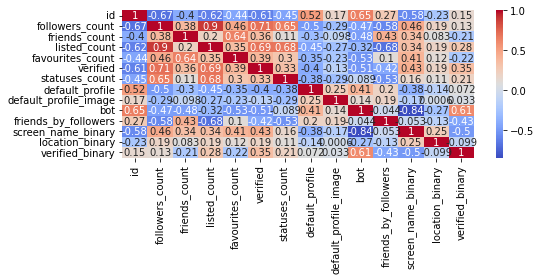

In [30]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(method='spearman'), cmap='coolwarm', annot=True)
plt.tight_layout()
plt.show()

There is no correlation between id, statuses_count, default_profile, default_profile_image and target variable.
There is strong correlation between verified, listed_count, friends_count, followers_count and target variable.
We cannot perform correlation for categorical attributes. So we will take screen_name, name, description, status into feature engineering. While use verified, listed_count for feature extraction.

# **Feature Engineering and Extraction**

In [31]:
bag_of_words_bot = r'bot|b0t|cannabis|tweet me|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                    r'expos|kill|clit|bbb|butt|fuck|XXX|sex|truthe|fake|anony|free|virus|funky|RNA|kuck|jargon' \
                    r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|xx|freak|ffd|dunia|clone|genie|bbb' \
                    r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|cheese|yeah|bio|magic|wizard|face'
            
training_data['screen_name_binary'] = training_data.screen_name.str.contains(bag_of_words_bot, case=False, na=False)
training_data['name_binary'] = training_data.name.str.contains(bag_of_words_bot, case=False, na=False)
training_data['description_binary'] = training_data.description.str.contains(bag_of_words_bot, case=False, na=False)
training_data['status_binary'] = training_data.status.str.contains(bag_of_words_bot, case=False, na=False)

In [32]:
training_data['listed_count_binary'] = (training_data.listed_count>20000)==False
features = ['screen_name_binary', 'name_binary', 'description_binary', 'status_binary', 'verified', 'followers_count', 'friends_count', 'statuses_count', 'listed_count_binary', 'bot']

# **Random Forest Classifier Implementation**

In [33]:
#You'll want sklearn's built-in train/test split function,

from sklearn.model_selection import train_test_split

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier as rf

In [35]:
def Performance(actual_value , predicted_value):
    accuracy = accuracy_score(actual_value , predicted_value) * 100
    precision = precision_score(actual_value , predicted_value) * 100
    recall = recall_score(actual_value , predicted_value) * 100
    f1 = f1_score(actual_value , predicted_value, average='weighted')
    print('Accuracy is {:.4f}%\n Precision is {:.4f}%\n Recall is {:.4f}%\nF1 Score is {:.4f}\n'.format(accuracy, precision, recall, f1))

In [36]:
#To check Performances
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [37]:

X = training_data[features].iloc[:,:-1]
y = training_data[features].iloc[:,-1]

rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=100, min_samples_split=20)

#Splitting these datasets further into training and test datasets.
#This prevents contamination, i.e. the model learning from the labels
#it's later going to try to predict. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


#Create a classification model with set parameters, and fit it to the
#training data.
rf = rf.fit(X_train, y_train)

#Test your model's accuracy by making a prediction on the test set
#that we've separated, and print that accuracy score
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))

Trainig Accuracy: 0.87685
Test Accuracy: 0.86071


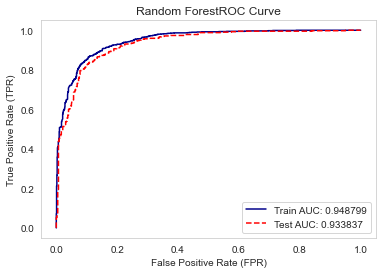

In [38]:
#as well as metrics for checking your model's accuracy
from sklearn.metrics import accuracy_score, roc_curve, auc
sns.set_style("whitegrid", {'axes.grid' : False})

scores_train = rf.predict_proba(X_train)
scores_test = rf.predict_proba(X_test)

y_scores_train = []
y_scores_test = []
for i in range(len(scores_train)):
    y_scores_train.append(scores_train[i][1])

for i in range(len(scores_test)):
    y_scores_test.append(scores_test[i][1])
    
fpr_rf_train, tpr_rf_train, _ = roc_curve(y_train, y_scores_train, pos_label=1)
fpr_rf_test, tpr_rf_test, _ = roc_curve(y_test, y_scores_test, pos_label=1)

plt.plot(fpr_rf_train, tpr_rf_train, color='darkblue', label='Train AUC: %5f' %auc(fpr_rf_train, tpr_rf_train))
plt.plot(fpr_rf_test, tpr_rf_test, color='red', ls='--', label='Test AUC: %5f' %auc(fpr_rf_test, tpr_rf_test))
plt.title("Random ForestROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')

# **Spam Detection of Bots**

In [39]:
data_df = bots[pd.notnull(bots['followers_count'])]

In [40]:
user_followers = list(data_df['followers_count'])
user_friends = list(data_df['friends_count'])

In [41]:
for i in range(len(user_followers)):
    if((user_friends[i]+user_followers[i])==0):
        print (i)

790


In [42]:
data_df=data_df.drop(data_df.index[790])

In [43]:
user_followers = list(data_df['followers_count'])
user_friends = list(data_df['friends_count'])
for i in range(len(user_friends)):
    if((user_friends[i]+user_followers[i])==0):
        print (i)

In [44]:
reputation = [0 for x in range(len(data_df))]
i = 0
y = 0 
f = 0
#y_actual = data_df['isfake']
#y_actual =list(y_actual)
for i in range(len(reputation)):
  #  if(user_friends[i]>user_follows[i] * 5):
    reputation[i]= user_followers[i]/(user_friends[i]+user_followers[i])
    i=i+1
print(reputation[0:10])

[1.0, 0.002857142857142857, 1.0, 1.0, 0.01455026455026455, 0.0053475935828877, 1.0, 0.9997569571029287, 1.0, 0.9444444444444444]


In [45]:
unique_ids = data_df['id']
len(unique_ids)

1320

In [46]:
final_df = pd.DataFrame(
    {'user_id': unique_ids,
     'reputation of user': reputation,
     'is_spam': data_df['bot'],
    })
final_df

,user_id,reputation of user,is_spam
0,8.160000e+17,1.000000,1
1,4.843621e+09,0.002857,1
2,4.303727e+09,1.000000,1
3,3.063139e+09,1.000000,1
4,2.955142e+09,0.014550,1
...,...,...,...
1316,3.299611e+09,1.000000,1
1317,7.450000e+17,0.972973,1
1318,2.598999e+09,0.652174,1
1319,2.386845e+09,1.000000,1


In [47]:
final_df.sort_values(by=['user_id'])

,user_id,reputation of user,is_spam
428,2.425231e+06,1.000000,1
60,8.752222e+06,0.941388,1
1102,1.072963e+07,0.999526,1
598,1.405239e+07,0.736185,1
494,1.514642e+07,0.533333,1
...,...,...,...
580,8.410000e+17,0.000000,1
610,8.410000e+17,0.230159,1
611,8.410000e+17,0.000000,1
676,8.410000e+17,0.000000,1


In [48]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train) 

RandomForestClassifier()

In [49]:
y_pred = rfc_model.predict(X_test)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred, target_names=['Human', 'Bot']))

              precision    recall  f1-score   support

       Human       0.88      0.90      0.89       423
         Bot       0.90      0.88      0.89       417

    accuracy                           0.89       840
   macro avg       0.89      0.89      0.89       840
weighted avg       0.89      0.89      0.89       840



In [51]:
print(confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")

[[381  42]
 [ 50 367]]
True Negatives: 381, False Positives: 42, False Negatives: 50, True Positives: 367


# **Save the Model**

In [52]:
#loading library
import pickle


In [53]:
# create an iterator object with write permission - model.pkl
with open('model_pkl', 'wb') as files:
    pickle.dump(rf, files)

In [55]:
pip install requests

  Using cached idna-3.3-py3-none-any.whl (61 kB)
  Using cached certifi-2021.10.8-py2.py3-none-any.whl (149 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\hp\pycharmprojects\jupnot\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
import requests